Particle counting
============
My [Dylos particle counter](http://www.dylosproducts.com/dcairqumowip.html) is a great, cheap way to measure air quality. The Dylos measures something comparable to PM2.5 — according to Dylos, under 25 is excellent quality air, and over 100 is poor quality air. 

We have a [BlueAir 603](http://www.amazon.com/Blueair-603-HepaSilent-Air-Purification-System/dp/B001G0ATXQ/ref=sr_1_9?s=home-garden&ie=UTF8&qid=1448809721&sr=1-9&keywords=blueair) Hepa air purifier in our living room downstairs (represented as a circle on the plot below).

I wanted to make a simple plot of air quality to see how distance to the BlueAir affected air quality.

The lowest reading is naturally on top of the BlueAir, and interestingly there is a clear transition in the hallway between the living room and kitchen. It looks like we need another air purifier in the kitchen...

In [283]:
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, SVG
%matplotlib inline

In [284]:
m = 1
grid_x, grid_y = np.mgrid[0:8:9j*m, 0:11:12j*m]

In [285]:
# map imported from google docs
map = """								
	135 110	134 107	138 113					
	135	104 137	108 110	144 109	148 114	153 116		
	154 126	102 116	113 133	143 115 121	144 107	146 113 124		
	191 147	202 107	205 110	142 129 106				
				143 114 100				
				78 115 100				
	69 64 65	79 64	88 63	60 98 61 68	61	56 64	49 62 49	
	65 56	65 58	56 63	55 61	64 55	63 52	49 62 49	
			60	61	62	61	50	
			66	66	66	69		
								"""

assert all(len(line.split('\t'))==9 for line in map.splitlines())

points = []
vals = []
for y, line in enumerate(map.splitlines()):
    lvals = line.split('\t')
    for x, val in enumerate(lvals):
        if not val: 
            points.append((x,y))
            vals.append(np.nan)
            continue
        
        multi_vals = val.strip().split(' ')
        
        points.append((x,y))
        vals.append(np.mean([float(v) for v in multi_vals]))

points = np.array(points)
vals = np.array(vals)

In [286]:
igrid = griddata(points, vals, (grid_x, grid_y), method='nearest')
#_ = plt.imshow(igrid.T, cmap='RdBu')
#_ = plt.colorbar()

In [287]:
def show_svg(svgs, width=1000, height=1000):
    SVG_HEAD = '''<?xml version="1.0" standalone="no"?><!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">'''
    SVG_START = '''<svg width="{w:}px" height="{h:}px" version="1.1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink= "http://www.w3.org/1999/xlink">'''
    SVG_END = '</svg>'
    return display(SVG(SVG_HEAD + SVG_START.format(w=width, h=height) + svgs + SVG_END))

def box(xy,wh,rgba=(50,50,50,1)):
    return '''<rect x="{}" y="{}" width="{}" height="{}" fill="rgba({:d},{:d},{:d},{:f})" stroke="rgba(0,0,0,0)" />
        '''.format(xy[0],xy[1], wh[0],wh[1], rgba[0],rgba[1],rgba[2],rgba[3])

def text(xy,txt,rgba=(250,250,250,1)):
    return '''<text x="{}" y="{}" text-anchor="middle" font-size="12" fill="rgba({:d},{:d},{:d},{:f})">{}</text>
        '''.format(xy[0],xy[1]+4, rgba[0],rgba[1],rgba[2],rgba[3],txt)

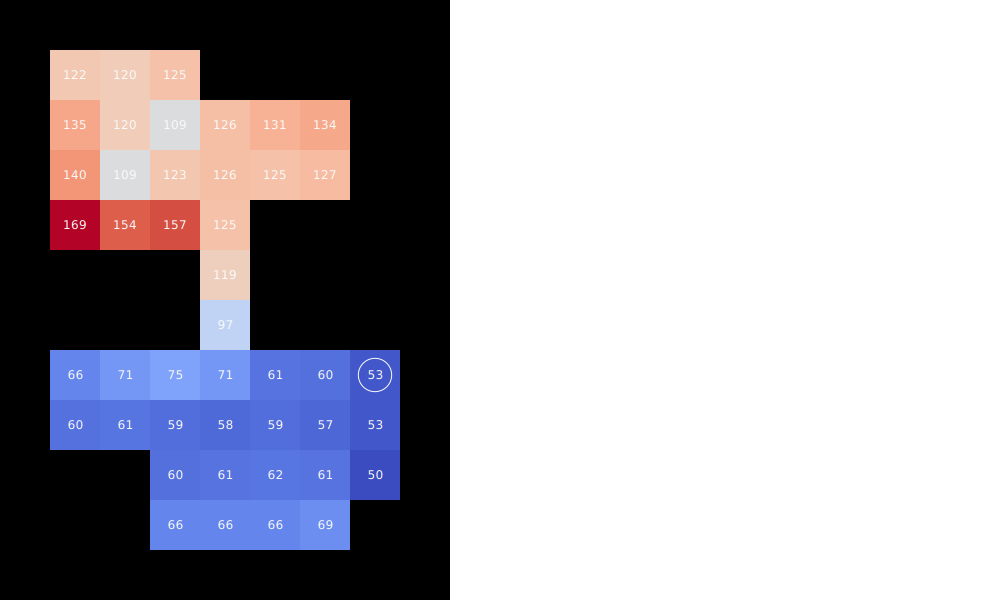

In [288]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

vmin, vmax = np.nanmin(igrid), np.nanmax(igrid)
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = ScalarMappable(norm=norm, cmap="coolwarm")

m = int(50/m)
wh = (m,m)
svgs = []

for x in range(len(igrid)):
    for y in range(len(igrid[0])):
        if np.isnan(igrid[x,y]):
            rgba = (0,0,0,1)
        else:
            _nval = igrid[x,y]
            r,g,b,a = cmap.to_rgba(_nval)
            rgba = (int(r*255), int(g*255), int(b*255), a)
        svgs.append(box((x*m,y*m), wh, rgba=rgba))

        if not np.isnan(igrid[x,y]):
            svgs.append(text((m/2+x*m,m/2+y*m), str(int(_nval))))

# show where my air purifier is
svgs.append('<circle cx="{}" cy="{}" r="{}" stroke="rgba(250,250,250,1)" fill="rgba(0,0,0,0)" />'.format(7.5*m, 7.5*m, m/3))

show_svg(''.join(svgs), height=600)